epochs: 0
Epoch: 0, Error: 0.37394622988317416
Epoch: 500, Error: 0.26119030910733654
Epoch: 1000, Error: 0.24978884010797575
Epoch: 1500, Error: 0.43753060631782514
Epoch: 2000, Error: 0.13965867729583004
Epoch: 2500, Error: 0.08342747056491706
Epoch: 3000, Error: 0.05327632907736379
Epoch: 3500, Error: 0.08140152056035561
Epoch: 4000, Error: 0.06854628281115592
Epoch: 4500, Error: 0.024219973579933884
Epoch: 5000, Error: 0.045211302021048325
Epoch: 5500, Error: 0.01924921333888263
Epoch: 6000, Error: 0.01725808038652965
Epoch: 6500, Error: 0.0011322923381948957
Epoch: 7000, Error: 0.02440453398654619
Epoch: 7500, Error: 0.0008789269784724718
Epoch: 8000, Error: 0.01070399816526979
Epoch: 8500, Error: 0.019070370871340645
Epoch: 9000, Error: 0.008441079901296167
Epoch: 9500, Error: 0.00781352706940186
epochs: 10000
Epoch: 10000, Error: 0.000580682281051792
Epoch: 10500, Error: 0.006632580517246467
Epoch: 11000, Error: 0.006282547812014205
Epoch: 11500, Error: 0.00048718678091308476
Ep

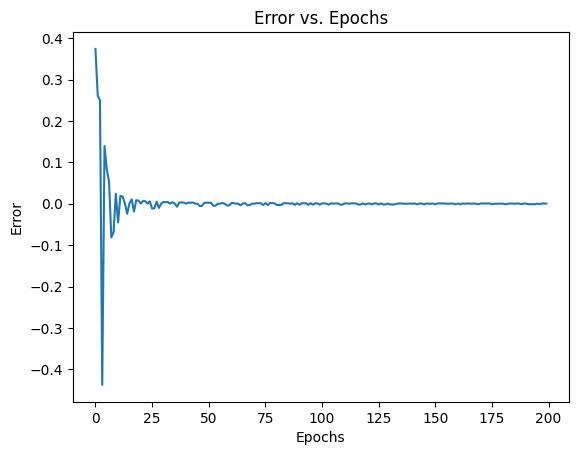

[0 0] [0.00104476]
[0 1] [0.99946739]
[1 0] [0.9995462]
[1 1] [0.99994958]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

# Create an empty list to store the errors
class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        errors = []
        for k in range(epochs):
            if k % 10000 == 0: print('epochs:', k)

            i = np.random.randint(X.shape[0])
            a = [X[i]]
            for l in range(len(self.weights)):
                dot_value = np.dot(a[l], self.weights[l])
                activation = self.activation(dot_value)
                a.append(activation)
            # output layer
            error = y[i] - a[-1]
                #print('epochs:', k,' and error:', error)
            deltas = [error * self.activation_prime(a[-1])]
            if k % 500 == 0:
              #errors.append(total_error)  # Append the error to the list
              errors += [error]
              total_error = np.mean(np.abs(error))
              print(f'Epoch: {k}, Error: {total_error}')
              #print('rrrrr:',errors)


            # we need to begin at the second to last layer
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] +=  learning_rate * layer.T.dot(delta)
            # Plot the errors
        fig, ax = plt.subplots()
        ax.plot(errors)
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.title('Error vs. Epochs')
        plt.show()
    def predict(self, x):
        a = np.concatenate((np.ones(1).T, np.array(x)))
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    #nn = NeuralNetwork([2,2,1],'tanh')
    nn = NeuralNetwork([2,2,1],'sigmoid')

    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    #AND
    #y = np.array([0,0,0,1])
    #OR
    y = np.array([0,1,1,1])
    #XOR
    #y = np.array([0, 1, 1, 0])

    nn.fit(X, y)

    for e in X:
        print(e,nn.predict(e))